In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
line_data = np.loadtxt("./data/line_data.txt")
pos_data = np.loadtxt("./data/groundtruth.txt")

In [3]:
pos_data.shape

(339, 8)

In [4]:
# Rho and Theta ranges
thetas = np.deg2rad(np.arange(-90.0, 90.0))
width, height = 860, 240
diag_len = int(np.ceil(np.sqrt(width * width + height * height)))   # max_dist
rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

# Cache some resuable values
cos_t = np.cos(thetas)
sin_t = np.sin(thetas)
num_thetas = len(thetas)

In [5]:
accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)

In [6]:
def hough_line(x, y):
  # Vote in the hough accumulator
  for t_idx in range(num_thetas):
    # Calculate rho. diag_len is added for a positive index
    rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
    accumulator[rho, t_idx] += 1
def reset_accumulator(accumulator):
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)

In [7]:
pos = np.copy(pos_data)
pos_data[0]

array([0.02229158, 0.1116875 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

In [8]:
time = line_data[0,0]
pos[:,0] -= time

In [9]:
pos = np.sort(pos, 0)
print(pos)
time

[[0.01707758 0.1116875  0.         ... 0.         0.         1.        ]
 [0.02657137 0.11379167 0.         ... 0.         0.         1.        ]
 [0.03717665 0.11633333 0.         ... 0.         0.         1.        ]
 ...
 [3.37626926 1.1        0.         ... 0.         0.         1.        ]
 [3.38675746 1.1        0.         ... 0.         0.         1.        ]
 [3.3972722  1.1        0.         ... 0.         0.         1.        ]]


0.005214001

In [10]:
pos_data

array([[0.02229158, 0.1116875 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03178537, 0.11379167, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.04239065, 0.11633333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [3.38148326, 1.09560417, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [3.39197146, 1.094125  , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [3.4024862 , 1.0924375 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [11]:
    for e in line_data[-500:]:

        #check if event is positive
        if e[3] == 1:

            #get time of event and interpolate the position
            time = e[0]
            pos = np.copy(pos_data)
            pos[:,0] = time - pos[:,0]
            pos = np.sort(np.abs(pos), 0)
            p1, p2 = pos[0], pos[1]
            print(p1[1])
            print(time)
            print(p2[1])

            times = np.array([p1[0], time, p2[0]])
            times = (times - times.min())/(times.max()-times.min())
            factor = times[1]
            print(factor)
            inter_position = p1[1] * factor
            print(p1[1])
            print(inter_position)
            print("---------")
            hough_line(np.abs(e[1]-240), inter_position)

0.1116875
2.971859
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.972301001
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.972792001
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.974472
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.979675
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.979925
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.980415
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.983116
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.984606
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.984606
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.984606
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.984606
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.984606
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.984606
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
2.984606
0.113791666667
1.0
0.11

0.1116875
3.096801001
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.100073001
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.100801
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.100801
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101002
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.101350001
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.104279001
0.113791666667
1.0
0.1116875
0.1116875
---------
0.1116875
3.105275001
0.113791666667

In [12]:
accumulator.max()

200

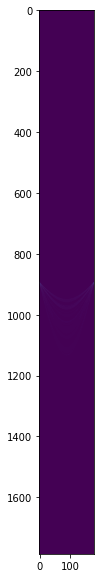

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.imshow(accumulator)
plt.show()

In [14]:
accumulator_thresh = accumulator
accumulator_thresh[accumulator_thresh <= accumulator_thresh.max()*0.1] = 0

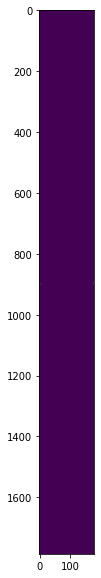

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.imshow(accumulator_thresh)
plt.show()

In [16]:
ids = np.where(accumulator_thresh > 0)
#angles = np.round((ids[1] - ids[1].min())/(ids[1].max() - ids[1].min())*10).astype(int)
angles = ids[1]

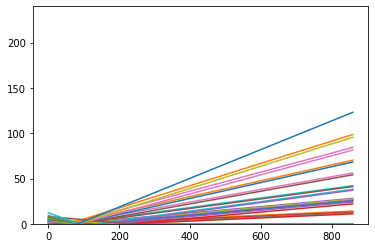

In [17]:
x = np.linspace(0, width)
a = np.array([])
p = np.array([])
for r, t in zip(ids[0], angles):
    if sin_t[t] != 0.0 and cos_t[t] != 0.0:
        y = (r - diag_len - x * cos_t[t]) / sin_t[t]
        a = np.append(a, (y[49] - y[0]) / (x[49] - x[0]))
        p = np.append(p, ((width/2*sin_t[t]) + (r - diag_len)) / cos_t[t])
        plt.plot(x, y)
    
plt.ylim([0, height])
plt.show()

In [18]:
a = (a - a.min()) / (a.max() - a.min())*10
a.shape

(41,)

In [19]:
p.shape

(41,)

In [20]:
p = np.round(p).astype(int)
p[p<0] = 0
p[p>=width] = 0
p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
row = np.zeros((width, 1))
for i, pix in enumerate(p):
    print(i)
    row[pix] = a[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


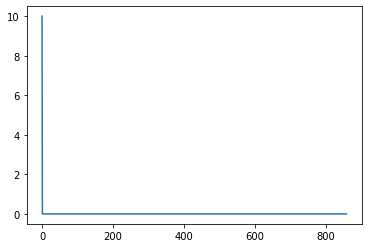

In [22]:
plt.plot(row)